In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load latest CSV
df = pd.read_csv("../benchmark_runs/benchmark_20250729_182123.csv")  # or use a specific timestamped one

# Summary stats
print(df.groupby("model")[["input_tokens", "output_tokens", "cost", "latency_ms"]].mean())



                         input_tokens  output_tokens      cost  latency_ms
model                                                                     
claude-3-haiku-20240307           0.0            0.0       NaN     13215.6
gemini-1.5-pro                    0.0            0.0       NaN      2345.8
gpt-4o                           26.8          116.2  0.001877      2281.2
mistral-large-latest             25.6          181.8  0.000000      4426.0


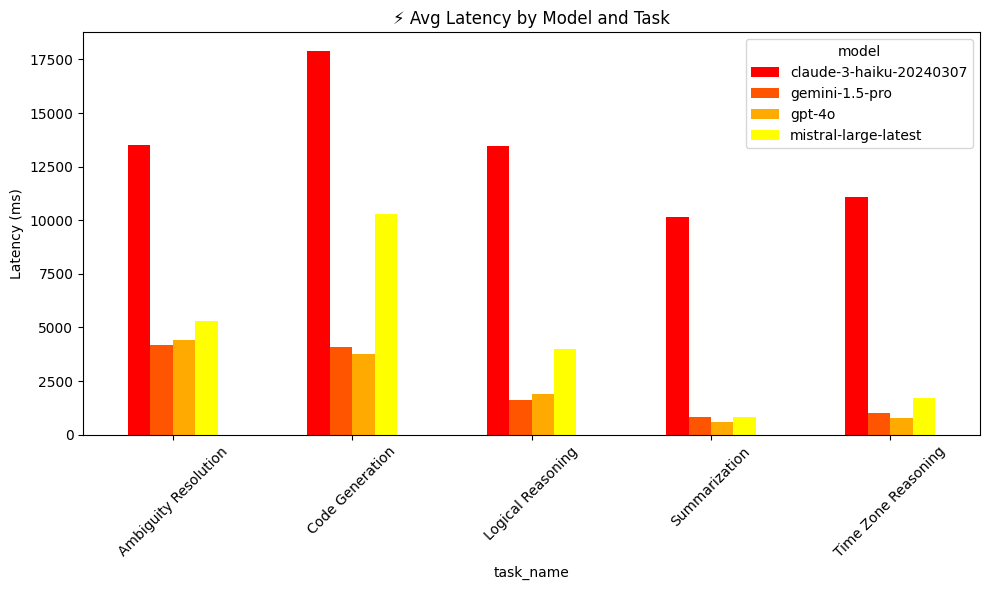

In [13]:
# Group by task and model, then compute average
summary = df.groupby(["task_name", "model"])[["cost", "latency_ms", "output_tokens"]].mean().reset_index()

# Pivot for better plotting
pivot_cost = summary.pivot(index="task_name", columns="model", values="cost")
pivot_latency = summary.pivot(index="task_name", columns="model", values="latency_ms")

# Plot: latency heatmap per task
pivot_latency.plot(kind="bar", figsize=(10, 6), title="⚡ Avg Latency by Model and Task", colormap="autumn")
plt.ylabel("Latency (ms)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:

pivot_latency

model,claude-3-haiku-20240307,gemini-1.5-pro,gpt-4o,mistral-large-latest
task_name,,,,
Ambiguity Resolution,13528.0,4175.0,4390.0,5308.0
Code Generation,17870.0,4091.0,3741.0,10309.0
Logical Reasoning,13463.0,1630.0,1890.0,4002.0
Summarization,10132.0,814.0,608.0,799.0
Time Zone Reasoning,11085.0,1019.0,777.0,1712.0
